# 1

In [24]:
%reset -f

In [25]:
import numpy as np
import cvxpy as cp

from data.team_data import n, m, m_test, sigma, train, test
np.set_printoptions(precision=4, suppress=True)
#b
print(n, m)
a = cp.Variable(n)
g = [None] * m
for i, (j, k, y) in enumerate(train):
    if y == -1:
        j, k = k, j
    j -= 1
    k -= 1
    Aa = a[j] - a[k]
    g[i] = cp.log_sum_exp(cp.vstack([0, -2 * Aa / sigma]))
g = cp.vstack(g)

obj = cp.Minimize(cp.sum(g))
constraints = [
        a >= 0,
        a <= 1,
        ]
problem = cp.Problem(obj, constraints) 
problem.solve()
print(f"problem status: {problem.status}")
print(f"a: {a.value}")
print(f"exp(mean(logprobs)): {np.exp(-problem.value / m)}")
#c
log_mine = []
log_dumb_algorithm = []
for i, (j, k, y) in enumerate(test):
    my_pred = 1 if (a.value[j - 1] - a.value[k - 1]) > 0 else -1
    #just making sure that data is the same
    assert tuple(train[i][:-1]) == (j, k)
    dumb_pred = train[i][-1]

    log_mine.append(my_pred == y)
    log_dumb_algorithm.append(dumb_pred == y)

print(f"Our algorithm success rate: {np.mean(log_mine)}")
print(f"Dumb algorithm success rate: {np.mean(log_dumb_algorithm)}")


10 45
problem status: optimal
a: [ 0.4875  1.      0.7571  1.      0.7571  0.7571  0.627   1.     -0.
  0.3249]
exp(mean(logprobs)): 0.6554819410406183
Our algorithm success rate: 0.7555555555555555
Dumb algorithm success rate: 0.7111111111111111


# 2

In [26]:
%reset -f

Problem name: Perimeter
Problem status: optimal
optimal value 139.34597715732585
Histogram of optimal radiuses


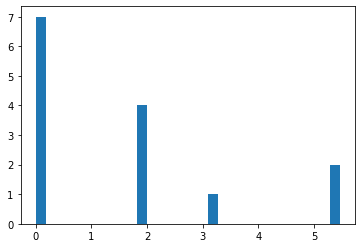

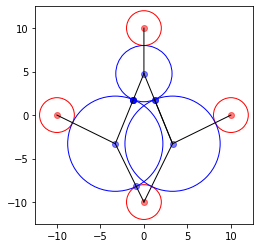

Problem name: Area
Problem status: optimal
optimal value 210.76672218250147
Histogram of optimal radiuses


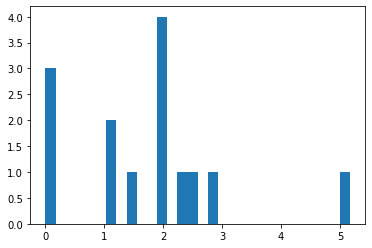

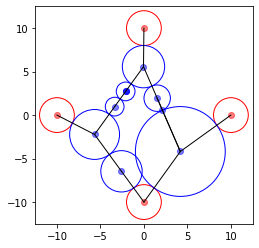

In [27]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from data.disks_data import n, k, lim, Cgiven, Rgiven, Gindexes, plot_disks

#fixing data
Cgiven = np.asarray(Cgiven)
Rgiven = np.asarray(Rgiven)
G = np.rint(np.asarray(Gindexes)).astype(int)

r = cp.Variable(n)
c = cp.Variable((n, 2))
constraints = [
        c[:k] == Cgiven,
        r[:k] == Rgiven,
        r >= 0,
        ]
for i, j in G:
    constraints.append(cp.norm(c[i] - c[j]) <= r[i] + r[j])

a_and_b = {
        'Perimeter': cp.Minimize(2 * np.pi * cp.sum(r)),
        'Area': cp.Minimize(np.pi * cp.sum_squares(r)),
        }

# print(G)
for name, obj in a_and_b.items():
    print(f"Problem name: {name}")
    problem = cp.Problem(obj, constraints)
    problem.solve()
    print(f"Problem status: {problem.status}")
    print(f"optimal value {problem.value}")
    print("Histogram of optimal radiuses")
    plt.hist(r.value, 30)
    plt.show()
#     print(r.value)
#     print(c.value)
    plot_disks(c.value, r.value, G, name)


# 4


In [28]:
%reset -f

In [31]:
import numpy as np
import cvxpy as cp

from data.currency_exchange_data import n, F, tickers, data, c_req, c_init
np.set_printoptions(precision=2, suppress=True)

value = np.zeros(n)
for i in range(n):
    value[i] = np.sqrt(F[i, 0] / F[0, i])
X = cp.Variable((n, n))
after_we_pay = c_init - cp.sum(X, axis=0)
c = after_we_pay + cp.sum(cp.multiply(X, 1/F), axis=1)
cost = value @ (c_init - c)
constraints = [
        c >= c_req,
        after_we_pay >= 0,
        X >= 0,
        cp.diag(X) == 0,
        ]
obj = cp.Minimize(cost)
problem = cp.Problem(obj, constraints)
problem.solve()
print(f"value: {value}")
print(f"problem status: {problem.status}")
print(f"optimal cost: {problem.value}")
print(f"optimal X:\n {X.value}")
print(f"Initial holding (c_init): {c_init}")
print(f"Required holding (c_req): {c_req}")
print(f"Final holding: {c.value}")


value: [1.   1.17 1.34 0.78 0.01 0.15 0.02 0.05 0.01 0.28]
problem status: optimal
optimal cost: 7.720059340057956
optimal X:
 [[  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.   545.45   0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [ 16.5    0.     0.     0.     0.     0.   727.27   0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.   369.09   0.     0.  ]
 [ 15.69   0.     0.     0.   181.82   0.     0.     0.     0.   181.82]
 [ 18.52   0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [509.98   0.     0.     0.     0.     0.     0.     0.     0.     0.  ]]
Initial holding (c_init): [1818.18 1636.36 1454.55 1272.73 1090.91  909.09  727.27  545.45  363.64
  181.82]
Required holding (c_req): [ 181.8